# ADM Homework 2
# Team #16: Iliyas Kyrykbayev, Andrea Potì, Xufeng Zhang

Contacts: ilyas.kyrykbayev@gmail.com, andrea.potto99@gmail.com, zhangxufeng1998@gmail.com

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter
from itertools import compress
import time

### Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\ADM\steam_reviews.csv")
df

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,1584986631,1586382422,True,0,...,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,1.589715e+09


## [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.

### Let's start by dropping duplicates if there are any

In [3]:
df.drop_duplicates(inplace = True)
df

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,1584986631,1586382422,True,0,...,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,1.589715e+09


### Number of rows decreased from 21747371 to 21612444, that means there were 134927 duplicates

### General information about the given dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

### Checking the strange column _'Unnamed: 0'_ for uniqueness

In [5]:
df['Unnamed: 0'].is_unique

True

### Renaming unique column _'Unnamed: 0'_ to _ID_ and placing it as an index

In [4]:
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)
df.set_index('id', inplace=True)
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


### Making timestamps readable

In [6]:
df['changed_timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['changed_timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')
df['author.last_played'] = pd.to_datetime(df['author.last_played'], unit='s')
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


### Checking the amount of reviews for each game

In [7]:
apps = df.groupby('app_name').nunique()
apps['author.steamid']

app_name
20XX                                       3610
A Hat in Time                             34979
A Short Hike                               5847
A Way Out                                 10941
ARK: Survival Evolved                    399995
                                          ...  
XCOM 2                                    61636
Yakuza 0                                  31775
Youtubers Life                            12621
theHunter: Call of the Wild™              67240
三国群英传8 Heroes of the Three Kingdoms 8      8111
Name: author.steamid, Length: 315, dtype: int64

### Plot the result

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from c

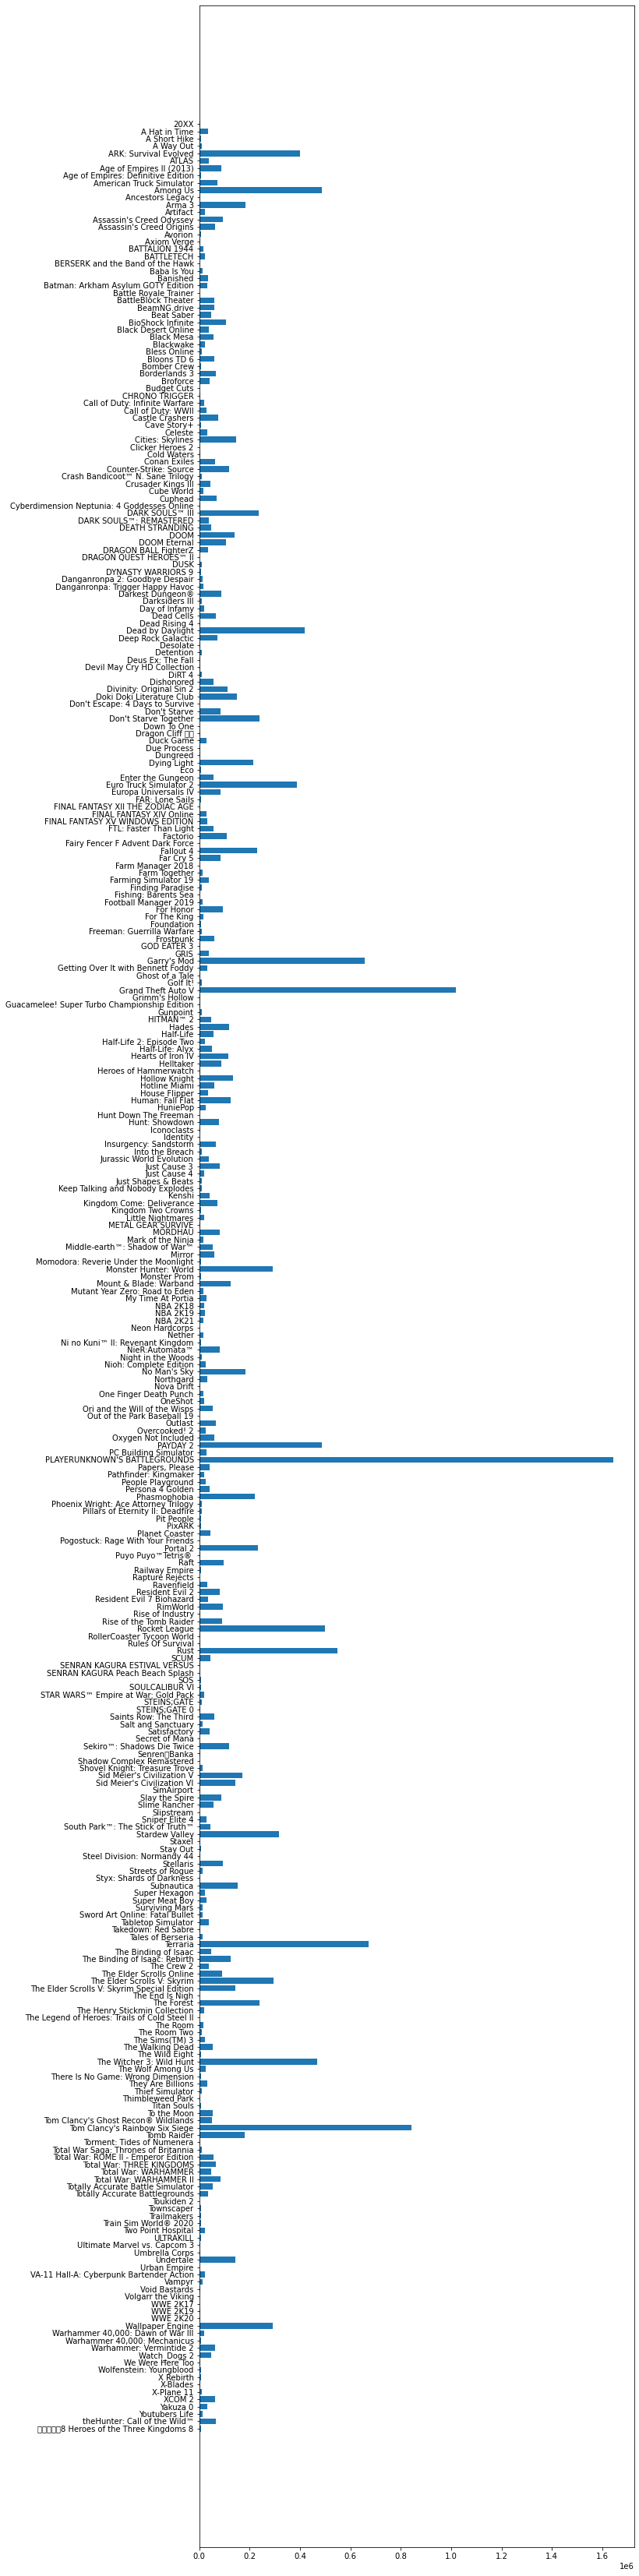

In [8]:
plt.figure(figsize = (10, 60))
plt.barh(apps.index, apps['author.steamid'])
plt.gca().invert_yaxis()

### Looks too crowded and it's too hard to read. Let's take only the popular games (more than 100 000 reviews)

In [9]:
# And also let's sort them by value
# using dictionary to sort both the names and quantities together
x = dict(zip(list(apps[apps['author.steamid'] > 100000].index), apps[apps['author.steamid'] > 100000]['author.steamid']))
x = dict(sorted(x.items(), key=lambda item: item[1]))
x

{'DOOM Eternal': 105196,
 'BioShock Infinite': 107270,
 'Factorio': 108282,
 'Divinity: Original Sin 2': 113508,
 'Hearts of Iron IV': 116255,
 'Counter-Strike: Source': 118075,
 'Hades': 118416,
 'Sekiro™: Shadows Die Twice': 119760,
 'Human: Fall Flat': 123604,
 'Mount & Blade: Warband': 123904,
 'The Binding of Isaac: Rebirth': 124372,
 'Hollow Knight': 134927,
 'DOOM': 139973,
 'The Elder Scrolls V: Skyrim Special Edition': 142509,
 "Sid Meier's Civilization VI": 143789,
 'Undertale': 144351,
 'Cities: Skylines': 147021,
 'Doki Doki Literature Club': 148837,
 'Subnautica': 152412,
 "Sid Meier's Civilization V": 171388,
 'Tomb Raider': 181045,
 "No Man's Sky": 182045,
 'Arma 3': 182335,
 'Dying Light': 214428,
 'Phasmophobia': 219090,
 'Fallout 4': 228956,
 'Portal 2': 232326,
 'DARK SOULS™ III': 235422,
 "Don't Starve Together": 238631,
 'The Forest': 239713,
 'Monster Hunter: World': 290946,
 'Wallpaper Engine': 292790,
 'The Elder Scrolls V: Skyrim': 294936,
 'Stardew Valley': 31

<BarContainer object of 47 artists>

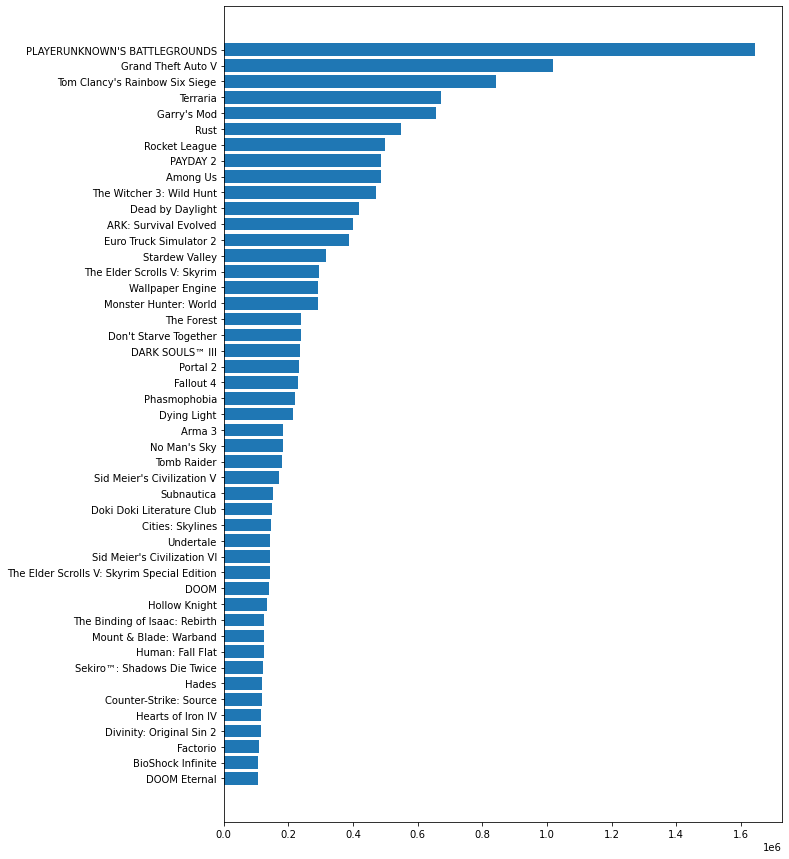

In [10]:
plt.figure(figsize = (10, 15))
plt.barh(list(x.keys()), list(x.values()))

In [11]:
#checking the amount of reviews in different languages
lang_count = df.groupby('language').nunique()
lang_count['author.steamid']

language
brazilian      481519
bulgarian        8582
czech           86172
danish          40611
dutch           59002
english       5287718
finnish         36335
french         344880
german         477920
greek           10850
hungarian       46613
italian         81815
japanese        51770
koreana        334112
latam           47354
norwegian       26196
polish         297099
portuguese      59573
romanian        24827
russian       1373941
schinese      2398615
spanish        492250
swedish         55683
tchinese       137731
thai            81489
turkish        341717
ukrainian       15472
vietnamese       4945
Name: author.steamid, dtype: int64

<BarContainer object of 28 artists>

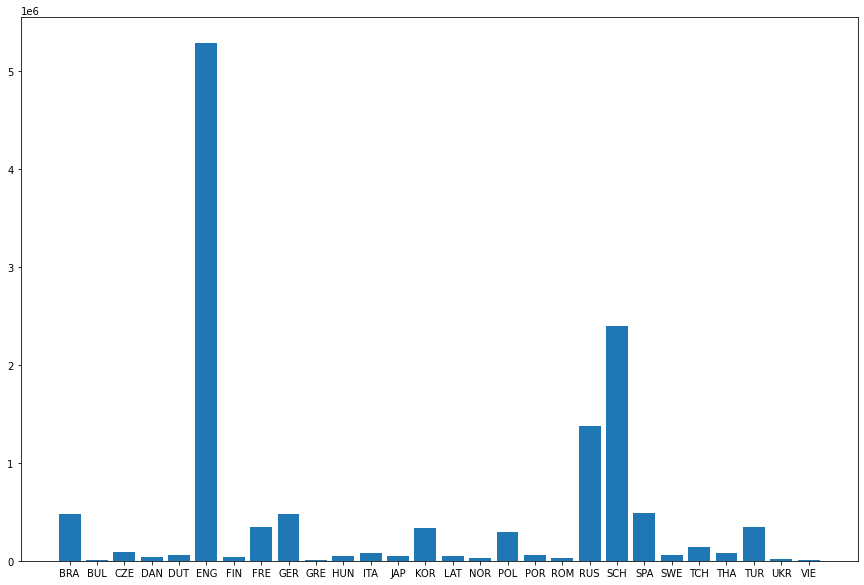

In [12]:
plt.figure(figsize = (15, 10))
plt.bar([''.join(str(x)[:3].upper()) for x in lang_count.index], lang_count['author.steamid'])

In [48]:
createdYM = [''.join(str(x)[0:7]) for x in pd.to_datetime(df['timestamp_created'], unit='s')]
createdYM = pd.DataFrame(createdYM)
createdYM.value_counts()

2019-11    993108
2020-11    941891
2019-12    848258
2020-03    777619
2020-12    739407
            ...  
2011-09      1033
2011-01       824
2011-03       591
2011-02       577
2010-11       555
Length: 123, dtype: int64

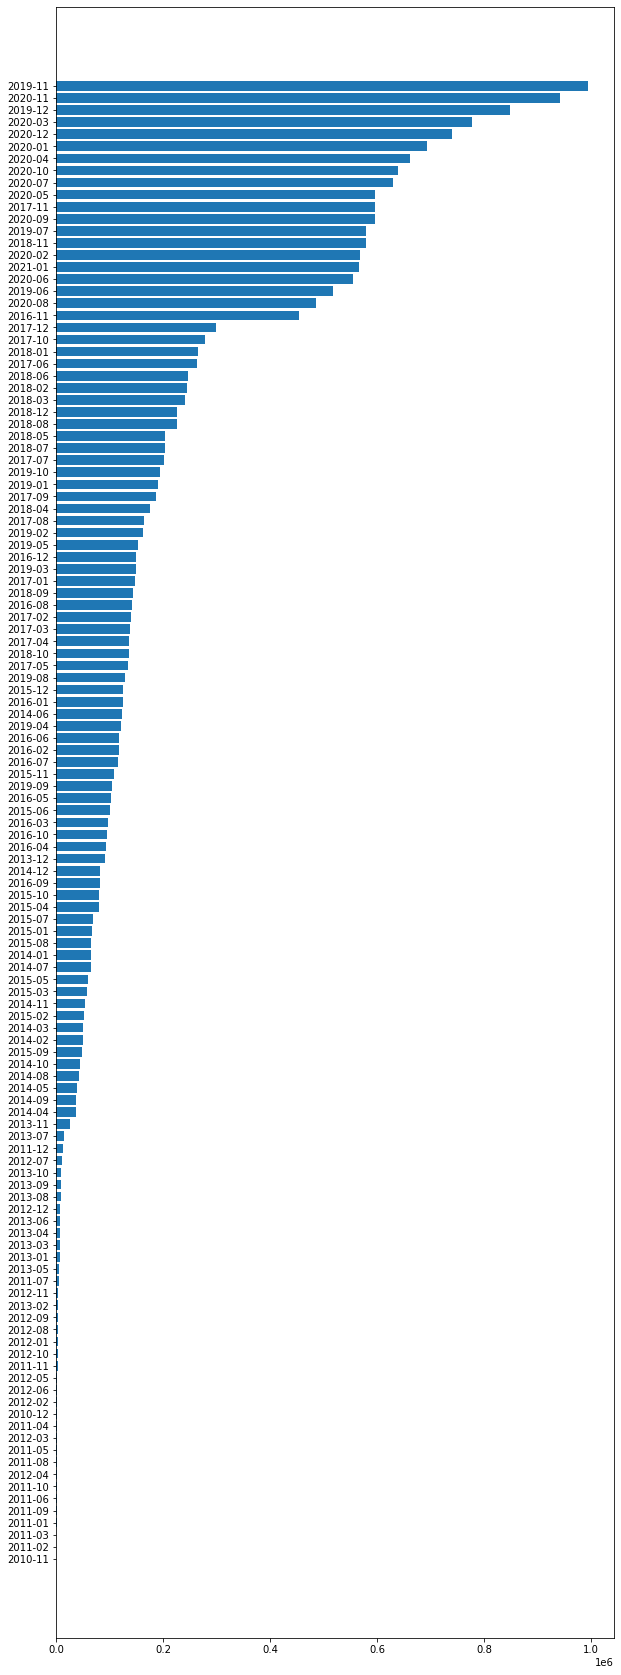

In [50]:
plt.figure(figsize = (10, 30))
plt.barh(createdYM[0].value_counts().index, createdYM.value_counts())
plt.gca().invert_yaxis()

In [51]:
recommended = df.groupby('recommended').nunique()
recommended['author.steamid']

recommended
False     2199111
True     11148219
Name: author.steamid, dtype: int64

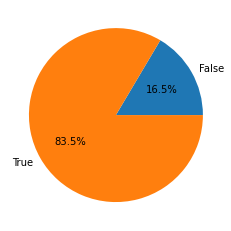

In [52]:
plt.pie(recommended['author.steamid'], labels = recommended.index, autopct='%1.1f%%')
plt.show() 

In [53]:
#checking how many people purchased games not from steam
steam_purchase = df.groupby('steam_purchase').nunique()
steam_purchase['author.steamid']

steam_purchase
False     3618210
True     10464838
Name: author.steamid, dtype: int64

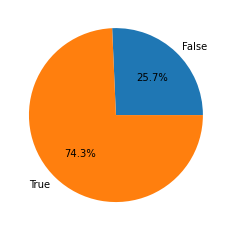

In [54]:
plt.pie(steam_purchase['author.steamid'], labels = steam_purchase.index, autopct='%1.1f%%')
plt.show() 

In [55]:
#checking how many people got the game for free
received_for_free = df.groupby('received_for_free').nunique()
received_for_free['author.steamid']

received_for_free
False    12100039
True       618693
Name: author.steamid, dtype: int64

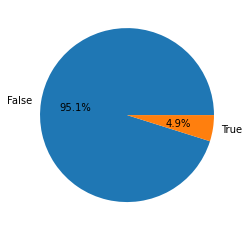

In [56]:
plt.pie(received_for_free['author.steamid'], labels = received_for_free.index, autopct='%1.1f%%')
plt.show() 

In [57]:
#checking how many people got the game for free
written_during_early_access = df.groupby('written_during_early_access').nunique()
written_during_early_access['author.steamid']

written_during_early_access
False    11552537
True      1792809
Name: author.steamid, dtype: int64

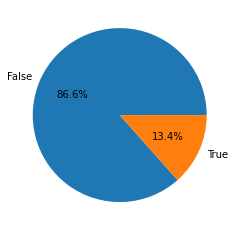

In [58]:
plt.pie(written_during_early_access['author.steamid'], labels = written_during_early_access.index, autopct='%1.1f%%')
plt.show() 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews       

## [RQ2] Let's explore the dataset by finding simple insights into the reviews.
- Plot the number of reviews for each application in descending order.
- What applications have the best Weighted Vote Score?
- Which applications have the most and the least recommendations?
- How many of these applications were purchased, and how many were given for free?

In [7]:
nappreview = df['app_name']
nappreview = list(nappreview)
votescore = df['weighted_vote_score']
votescore = list(votescore)

### Plot the number of reviews for each application in descending order.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 40857 missing from c

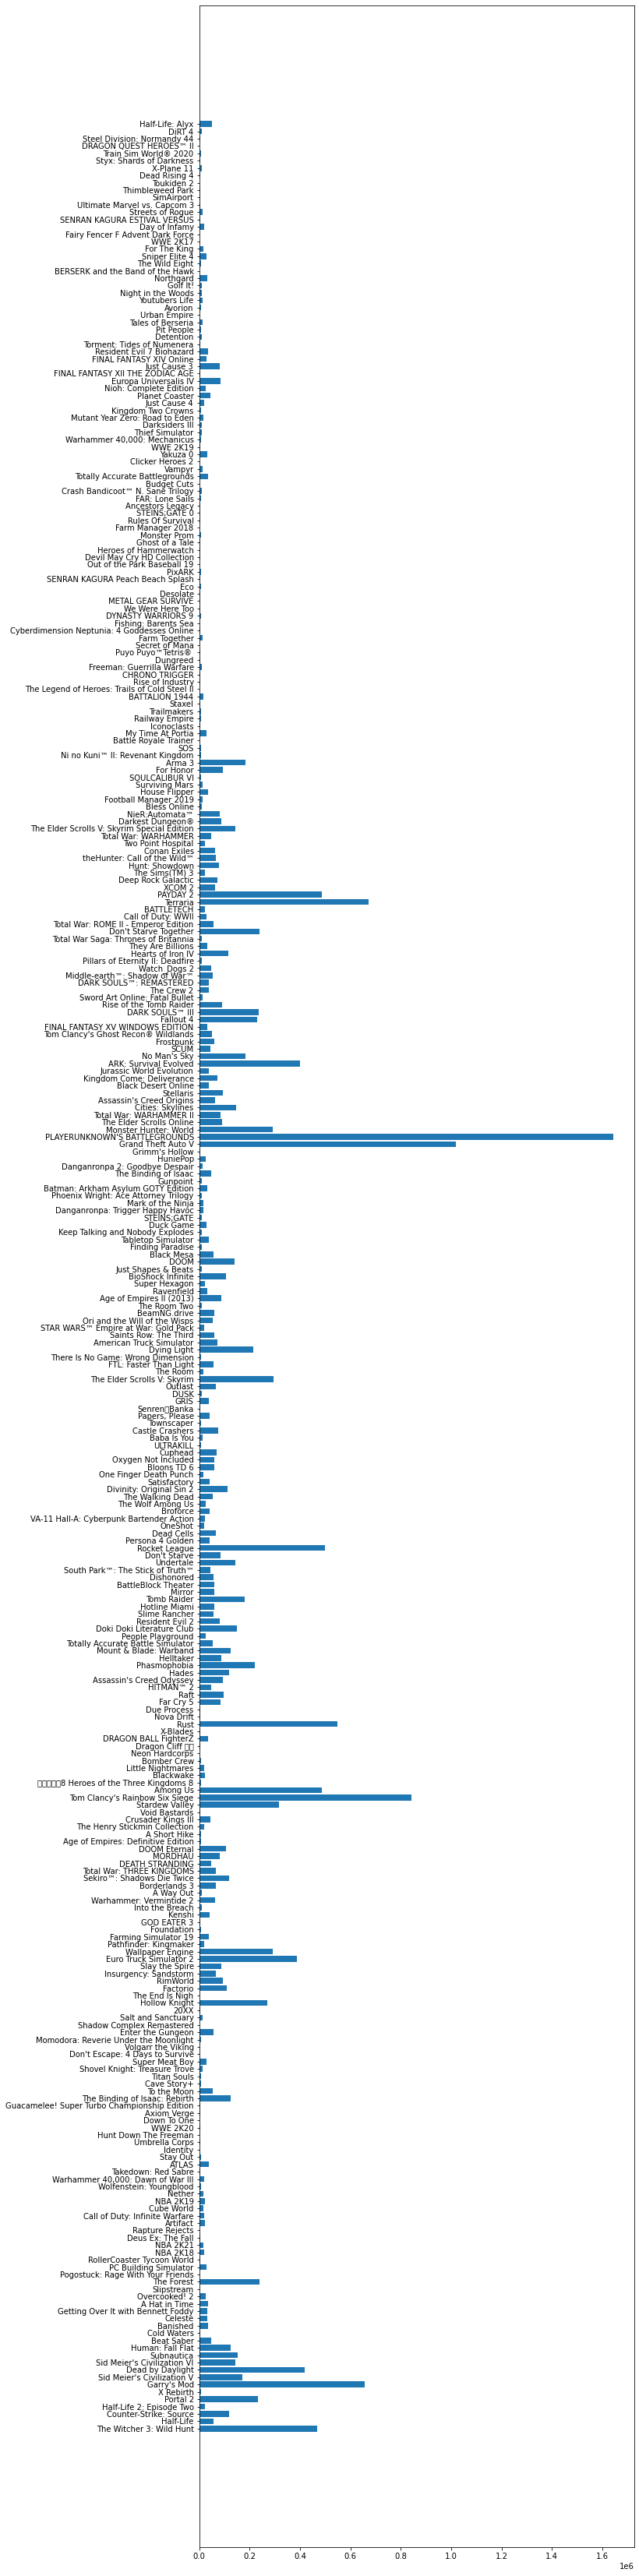

In [8]:
#2-1 the number of reviewers for each app
dict = {}
for key in nappreview:
    dict[key] = dict.get(key, 0) + 1 # count reviewers for different games

plt.figure(figsize = (10, 60))
plt.barh(list(dict.keys()), list(dict.values()))  
plt.show() # figure

### What applications have the best Weighted Vote Score?

In [9]:
#2-2 the best Weighted Vote Score?
appname = nappreview
data = {'app':appname,
        'score':votescore}
d = pd.DataFrame(data)
best = d.iloc[d.score.argmax()]
print(best['app'])

Stardew Valley


### Which applications have the most and the least recommendations?

In [10]:
#2-3 the most and the least recommendations?
rec = df['recommended']
full_recommend = list(compress(appname, rec))#drop the flase items
rdict = {}
for key in full_recommend:
    rdict[key] = rdict.get(key, 0) + 1 #count the number for each game

redata = pd.Series(rdict) # transfer to pd series
redata = redata.sort_values()

min_code = redata.keys()[0] # find the min value
print(f'min:{min_code}')

max_code = redata.keys()[-1] # find the max value
print(f'max:{max_code}')

min:Neon Hardcorps
max:PLAYERUNKNOWN'S BATTLEGROUNDS


### How many of these applications were purchased, and how many were given for free?

In [13]:
#2-4 How many of these applications were purchased, and how many were given for free?
# purchased part
pur = df['steam_purchase']
purchase = list(compress(appname, pur))

pdict = {}
for i in purchase:
    pdict[i] = pdict.get(i, 0) + 1

print('Number of each game purchased:',pdict)


Number of each game purchased: {'The Witcher 3: Wild Hunt': 429409, 'Half-Life': 43875, 'Counter-Strike: Source': 74817, 'Half-Life 2: Episode Two': 17538, 'Portal 2': 182952, 'X Rebirth': 4934, "Garry's Mod": 551250, "Sid Meier's Civilization V": 105467, 'Dead by Daylight': 305787, "Sid Meier's Civilization VI": 98753, 'Subnautica': 139670, 'Human: Fall Flat': 94211, 'Beat Saber': 42142, 'Cold Waters': 2622, 'Banished': 30180, 'Celeste': 28773, 'Getting Over It with Bennett Foddy': 28427, 'A Hat in Time': 27262, 'Overcooked! 2': 18484, 'Slipstream': 607, 'The Forest': 202014, 'Pogostuck: Rage With Your Friends': 2070, 'PC Building Simulator': 24188, 'RollerCoaster Tycoon World': 2893, 'NBA 2K18': 14722, 'NBA 2K21': 11006, 'Deus Ex: The Fall': 2808, 'Rapture Rejects': 290, 'Artifact': 19473, 'Call of Duty: Infinite Warfare': 9751, 'Cube World': 8281, 'NBA 2K19': 15291, 'Nether': 14174, 'Wolfenstein: Youngblood': 6292, 'Warhammer 40,000: Dawn of War III': 10269, 'Takedown: Red Sabre': 3

In [12]:
#2-4 free part
fr = df['received_for_free']
free = list(compress(appname, fr))

fdict = {}
for i in free:
    fdict[i] = fdict.get(i, 0) + 1

print('Number of each game free received:',fdict)

Number of each game free received: {'The Witcher 3: Wild Hunt': 5748, 'Half-Life': 2799, 'Counter-Strike: Source': 5082, 'Half-Life 2: Episode Two': 897, 'Portal 2': 5779, 'X Rebirth': 35, "Garry's Mod": 24765, "Sid Meier's Civilization V": 1660, 'Dead by Daylight': 20234, "Sid Meier's Civilization VI": 2130, 'Subnautica': 2605, 'Human: Fall Flat': 3496, 'Beat Saber': 455, 'Cold Waters': 28, 'Banished': 185, 'Celeste': 414, 'Getting Over It with Bennett Foddy': 868, 'A Hat in Time': 820, 'Overcooked! 2': 357, 'Slipstream': 47, 'The Forest': 7393, 'Pogostuck: Rage With Your Friends': 67, 'PC Building Simulator': 732, 'RollerCoaster Tycoon World': 61, 'NBA 2K18': 213, 'NBA 2K21': 242, 'Deus Ex: The Fall': 24, 'Rapture Rejects': 311, 'Artifact': 619, 'Call of Duty: Infinite Warfare': 1988, 'Cube World': 1045, 'NBA 2K19': 492, 'Nether': 85, 'Wolfenstein: Youngblood': 125, 'Warhammer 40,000: Dawn of War III': 645, 'Takedown: Red Sabre': 64, 'ATLAS': 793, 'Stay Out': 1012, 'Identity': 40, 'U

## [RQ3] Now it's important to understand the preferred time to do reviews.
- What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
- Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
- Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [14]:
#3-1 What is the most common time that authors review an application? 
timestamp = df['timestamp_created']
newtime = []
for i in timestamp:
    timearray = time.localtime(int(i))
    newtime.append(time.strftime("%H:%M", timearray))

timedict = {}
for i in newtime:
    timedict[i] = timedict.get(i, 0) + 1
    
timedata = pd.Series(timedict) # transfer to pd series
timedata = timedata.sort_values()

min_code = timedata.keys()[0] # find the least value
print(f'min:{min_code}')

max_code = timedata.keys()[-1] # find the most value
print(f'max:{max_code}')


min:12:02
max:20:50


### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
# &
### Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

In [16]:
# 3-2 + 3-3
newtimestamp = df['timestamp_created']
newtime2 = []
for i in timestamp.index:
    timearray = time.localtime(int(newtimestamp[i]))
    newtime2.append(time.strftime("%H:%M:%S", timearray)) #change the fromat of original data

In [17]:
# function that question required
def countn(initial,end):
    count = []
    for i in range(len(initial)):
        sumn = 0
        endi = time.strptime(end[i], '%H:%M:%S')
        endi = time.strftime("%H:%M:%S", endi)
        initiali = time.strptime(initial[i], '%H:%M:%S')
        initiali = time.strftime("%H:%M:%S", initiali)
        for j in range(len(newtime2)):
            if (newtime2[j] < endi) and (newtime2[j] > initiali):
                sumn = sumn + 1
        count.append(sumn)# count the number between initial[i] and end[i]
    #print(count)
    time_plot_dic = {}
    for i in range(len(initial)):
        time_key = initial[i] + '-' + end[i]
        time_plot_dic[time_key] = count[i]
    plt.bar(time_plot_dic.keys(), time_plot_dic.values())
    plt.xticks(rotation = 45)
    plt.show()
    return(count)

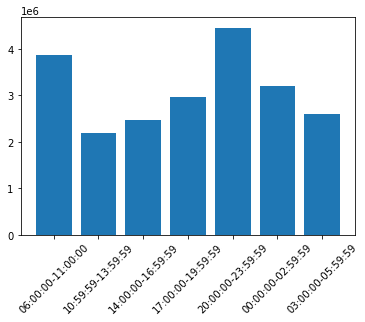

[3873930, 2180811, 2467369, 2971434, 4453249, 3205078, 2592383]

In [18]:
initial = ['06:00:00','10:59:59','14:00:00','17:00:00','20:00:00','00:00:00','03:00:00']
end = ['11:00:00','13:59:59','16:59:59','19:59:59','23:59:59','02:59:59','05:59:59']
countn(initial,end)

## [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

- What are the top 3 languages used to review applications?
- Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.
- Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?
- Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

### What are the top 3 languages used to review applications?

In [19]:
languages = list(df.loc[:,"language"])
languages_counter = Counter(languages)
top_3_languages = [language_tuple[0] for language_tuple in languages_counter.most_common(3)]

In [20]:
# Print results
print(top_3_languages)

['english', 'schinese', 'russian']


### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [21]:
def review_of_given_languages(dataset, languages):
    return dataset[dataset['language'].isin(filter_languages)]

In [22]:
# Try function with one example
filter_languages = ['turkish', 'french', 'english']
review_of_given_languages(df, filter_languages)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
7,292030,The Witcher 3: Wild Hunt,85183602,turkish,.\n,1611378312,1611378312,True,0,0,...,True,False,False,76561199084188849,9,1,2701.0,0.0,2701.0,1.609671e+09
18,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747369,546560,Half-Life: Alyx,65645167,english,best game ever\n,1584986750,1584986750,True,0,0,...,True,False,False,76561198817267089,86,8,1055.0,14.0,45.0,1.611138e+09
21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09


### Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In [23]:
# Count all rows of dataset filtered by 3 top languages
rows_df_top = review_of_given_languages(df, top_3_languages)
n_rows_df_top = rows_df_top.shape[0]

In [24]:
# Count funny_vote rows
n_rows_funny = rows_df_top[rows_df_top['votes_funny'] == 1].shape[0]
# Calculate percentage
percentage = (n_rows_funny/n_rows_df_top)*100

In [25]:
# Print results
print('{:.2f}'.format(percentage) + ' %')

7.71 %


### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [26]:
# Count helpful_vote rows
n_rows_helpful = rows_df_top[rows_df_top['votes_helpful'] == 1].shape[0]
# Calculate percentage
percentage = (n_rows_helpful/n_rows_df_top)*100

In [27]:
# Print results
print('{:.2f}'.format(percentage) + ' %')

16.88 %


## [RQ5] The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

- Plot the top 10 most popular reviewers and the number of reviews.
- What applications did the most popular author review?
- How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
- How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

### Plot the top 10 most popular reviewers and the number of reviews.

In [28]:
# Top 10 most popular authors are the ones that did most of reviews in this dataset.
authors = list(df.loc[:,'author.steamid'])
authors_counter = Counter(authors)
top_10_authors = authors_counter.most_common(10)

In [29]:
# Print results
for i in range(10):
    print("The " + str(i+1) + " most popular author is " + str(top_10_authors[i][0]) + " with " + str(top_10_authors[i][1]) + " reviews.")

The 1 most popular author is 76561198062813911 with 149 reviews.
The 2 most popular author is 76561198315585536 with 132 reviews.
The 3 most popular author is 76561198192166873 with 107 reviews.
The 4 most popular author is 76561198239163744 with 106 reviews.
The 5 most popular author is 76561198045381877 with 103 reviews.
The 6 most popular author is 76561198064946151 with 100 reviews.
The 7 most popular author is 76561198013146396 with 99 reviews.
The 8 most popular author is 76561198027973295 with 96 reviews.
The 9 most popular author is 76561197969749884 with 88 reviews.
The 10 most popular author is 76561197989746995 with 86 reviews.


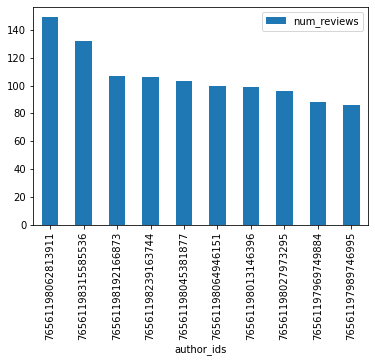

In [30]:
# Plot results in a histogram using matplotlib
df_plot = pd.DataFrame(top_10_authors, columns=['author_ids', 'num_reviews'])
df_plot.plot(kind='bar', x='author_ids')

### What applications did the most popular author review?

In [31]:
# Take the first id from the previous dictionary
most_popular_author_id = top_10_authors[0][0]
most_popular_author_id

76561198062813911

In [32]:
# Filter dataset for the most popular author
df_most_popular_author = df[df['author.steamid'] == most_popular_author_id]
applications = list(df_most_popular_author.loc[:,"app_name"])

In [33]:
print(applications)

['Half-Life', 'Counter-Strike: Source', 'Half-Life 2: Episode Two', 'Portal 2', "Garry's Mod", "Sid Meier's Civilization V", 'Dead by Daylight', "Sid Meier's Civilization VI", 'Subnautica', 'Human: Fall Flat', 'Banished', 'Celeste', 'Getting Over It with Bennett Foddy', 'A Hat in Time', 'The Forest', 'Axiom Verge', 'The Binding of Isaac: Rebirth', 'To the Moon', 'Cave Story+', 'Titan Souls', 'Super Meat Boy', "Don't Escape: 4 Days to Survive", 'Volgarr the Viking', 'Enter the Gungeon', 'Salt and Sanctuary', 'Hollow Knight', 'The End Is Nigh', 'Factorio', 'RimWorld', 'Insurgency: Sandstorm', 'Euro Truck Simulator 2', 'Foundation', 'Kenshi', 'Into the Breach', 'Warhammer: Vermintide 2', 'DOOM Eternal', 'Age of Empires: Definitive Edition', 'Void Bastards', 'Stardew Valley', 'Among Us', 'Blackwake', 'Little Nightmares', 'Bomber Crew', 'Rust', 'HITMAN™ 2', 'Phasmophobia', 'Mount & Blade: Warband', 'Resident Evil 2', 'Slime Rancher', 'Hotline Miami', 'Tomb Raider', 'BattleBlock Theater', 'D

### How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [34]:
# In this excercise I'm not counting the rows with both 'steam_purchase' and 'received_for_free' set to False.
total_number_of_reviews = df_most_popular_author.shape[0]
df_purchase = df_most_popular_author[df_most_popular_author['steam_purchase'] == True]
df_free = df_most_popular_author[df_most_popular_author['received_for_free'] == True]
number_of_purchase = df_purchase.shape[0]
number_of_free = df_free.shape[0]

In [35]:
# Calculate percentage
percentage_number_of_purchase = (number_of_purchase/total_number_of_reviews)*100
percentage_number_of_free = (number_of_free/total_number_of_reviews)*100

In [36]:
# Print results
print('Purchase percentage: ' + '{:.2f}'.format(percentage_number_of_purchase) + ' %')
print('For free percentage: ' + '{:.2f}'.format(number_of_free) + ' %')

Purchase percentage: 73.83 %
For free percentage: 4.00 %


### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [37]:
num_purchase_positive = df_purchase[df_purchase['recommended'] == True].shape[0]
num_purchase_negative = df_purchase[df_purchase['recommended'] == False].shape[0]
num_free_positive = df_free[df_free['recommended'] == True].shape[0]
num_free_negative = df_free[df_free['recommended'] == False].shape[0]

In [38]:
# Print results
print('Number of positive reviews of purchase games ' + str(num_purchase_positive))
print('Number of negative reviews of purchase games ' + str(num_purchase_negative))
print('Number of positive reviews of free games ' + str(num_free_positive))
print('Number of negative reviews of free games ' + str(num_free_negative))

Number of positive reviews of purchase games 108
Number of negative reviews of purchase games 2
Number of positive reviews of free games 4
Number of negative reviews of free games 0


## [RQ6] It's time to get information from the updates that a user does to his reviews.
- What is the average time (days and minutes) a user lets pass before he updates a review?
- Plot the top 3 authors that usually update their reviews.

### What is the average time (days and minutes) a user lets pass before he updates a review?

We are going to work only with those reviews which were updated, so let's take only the important part of the dataset:

In [5]:
df_upd = df[(df['timestamp_created']-df['timestamp_updated']) < 0]
df_upd

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
13,292030,The Witcher 3: Wild Hunt,85181146,russian,Замечательная карточная игра в антураже фэнтез...,1611374238,1611374309,True,0,0,...,True,False,False,76561197987104694,501,23,7310.0,0.0,7310.0,1.525555e+09
27,292030,The Witcher 3: Wild Hunt,85177648,schinese,🎁\n🎁’[h1] [b]‘官方奖励免费活动链接:→ https://usnhskhf.w...,1611368730,1611379495,True,39,0,...,True,False,False,76561198326913512,69,28,1734.0,0.0,1734.0,1.608667e+09
39,292030,The Witcher 3: Wild Hunt,85174926,english,The game is enjoyable enough but...\n-Combat h...,1611364401,1611364470,True,0,0,...,True,False,False,76561198020027165,208,105,497.0,370.0,398.0,1.611370e+09
41,292030,The Witcher 3: Wild Hunt,85173767,turkish,Kesinlikle oynadığım en iyi oyun.Oyun sizi atm...,1611362536,1611364881,True,0,0,...,False,False,False,76561198316530785,217,34,6841.0,2077.0,6841.0,1.611364e+09
51,292030,The Witcher 3: Wild Hunt,85170497,schinese,我玩了这么长时间，这个游戏挺好玩的，原谅我不会说什么赞美的话\n还有一点[spoiler]我...,1611357379,1611357430,True,0,0,...,True,False,False,76561199039857291,8,5,10699.0,0.0,10699.0,1.610064e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747361,546560,Half-Life: Alyx,65645333,english,"""""""""Not all lefties want to walk with their Ri...",1584986911,1585589559,True,0,0,...,True,False,False,76561198055305524,106,12,1876.0,0.0,44.0,1.586608e+09
21747362,546560,Half-Life: Alyx,65645312,english,"Ouch.\n\nI've played a LOT of other VR titles,...",1584986884,1584989792,True,14,0,...,False,False,False,76561197997569585,383,32,1329.0,0.0,25.0,1.604158e+09
21747367,546560,Half-Life: Alyx,65645193,spanish,"Juegazo, y ademas con el ADN de Half Life al 1...",1584986790,1585125462,True,1,0,...,True,False,False,76561198041215776,958,120,1543.0,0.0,52.0,1.605652e+09


Average and mean are interexchangable, so we are going to settle with .mean() function to find the average time

In [6]:
time_mean = pd.to_datetime((df_upd['timestamp_updated'] - df_upd['timestamp_created']), unit='s').mean()
time_mean

Timestamp('1970-11-18 00:46:36.172313920')

In computer vision years start from 1970, not from 0, so we can say that in average people update their reviews after 11 months.

Now let's write the function that takes timestamp and converts it to days and minutes

In [52]:
def datetime_to_days_minutes(x):
    months = int(str(x)[5:7])
    days = int(str(x)[8:10])
    hours = int(str(x)[11:13])
    minutes = int(str(x)[14:16])
    seconds = int(str(x)[17:19])
    days += months*30
    minutes += hours*60
    return days, minutes

In [53]:
d, m = datetime_to_days_minutes(time_mean)
print(d, "days", m, "minutes")

348 days 46 minutes


In average user lets pass **348 days** and **46 minutes** before he updates his review.

### Plot the top 3 authors that usually update their reviews

value_counts() is the only integrated function that we need here. What a beautiful function that does everything for us!

In [67]:
df_upd['author.steamid'].value_counts()

76561198192166873    95
76561198206999976    61
76561198072450805    60
76561197997059777    59
76561197999935168    58
                     ..
76561198112018148     1
76561198386036232     1
76561198060327778     1
76561198062905875     1
76561198116747069     1
Name: author.steamid, Length: 1644305, dtype: int64

Let's show the top 3 authors with the box plot

<BarContainer object of 3 artists>

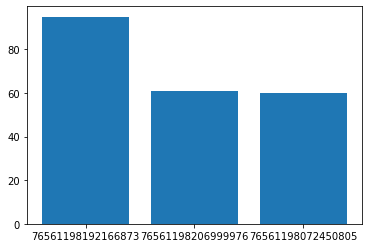

In [76]:
plt.bar(list(map(str, list(df_upd['author.steamid'].value_counts()[:3].index))), df_upd['author.steamid'].value_counts()[:3])

Looks great! One user updated 95 of his reviews, he surely played a lot of games and changed his mind a lot. Let's take a look at his reviews:

In [83]:
df_upd[df_upd['author.steamid'] == 76561198192166873]['review']

id
418649      [b][quote]欢迎订阅我的「个人鉴赏家[url=https://store.steam...
1617220     [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
2043743     [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
2257813     [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
2402270     [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
                                  ...                        
21358164    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
21417710    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
21450210    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
21584709    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
21659211    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
Name: review, Length: 95, dtype: object

Uh... that user is actually just a spammer, what a shame. Maybe the second reviewer is a real gamer?

In [86]:
df_upd[df_upd['author.steamid'] == 76561198206999976]['review']

id
437525      [h1]Review zu The Witcher 3: Wild Hunt[/h1]\n\...
494945      [h1]Review zu Half-Life[/h1]\n\nHalf-Life ist ...
553346      [h1]Review zu Counter-Strike: Source[/h1]\n\nI...
830711      [h1]Review zu Portal 2[/h1]\n\n[b]Meine Güte i...
1628912     [h1]Review zu Sid Meier´s Civilization V[/h1]\...
                                  ...                        
20803254    [h1]Review zu Ghost of a Tale[/h1]\n\n[b]Vorsi...
21393875    [h1]Review zu Northgard[/h1]\n\nNorthgard sieh...
21443318    [h1]Review zu Sniper Elite 4[/h1]\n\nIch habe ...
21599149    [h1]Review zu Hollow Knight[/h1]\n\n[b]Meine G...
21628503    [h1]Review zu Day of Infamy[/h1]\n\nDay of Inf...
Name: review, Length: 61, dtype: object

Conclusion: Steam needs a better way to filter out spammers.

## [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

- What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?
- What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?
- Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [5]:
df_weighted_scores = df[df['weighted_vote_score'] >= 0.5]
probability_weighted_scores = df_weighted_scores.shape[0]/df.shape[0]

In [6]:
# Print result
print(probability_weighted_scores)

0.21998484322541792


### What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [7]:
# Remembering the formula P(A|B) = P(A∩B) / P(B)

# Updated my P(B) since it is only bigger than and not equal or bigger
df_weighted_scores = df[df['weighted_vote_score'] > 0.5]
probability_weighted_scores = df_weighted_scores.shape[0]/df.shape[0]

# Calculate intersection and conditional probability
total_cases = df.shape[0]
probability_intersection = df[(df['votes_funny'] >= 1) & (df['weighted_vote_score'] > 0.5)].shape[0]/total_cases
conditional_probability = probability_intersection/probability_weighted_scores

In [8]:
# Print result
print(conditional_probability)

0.24978288914523247


### Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

In [9]:
# They are independent if P(A|B) = P(A) 
# I have to recalculate P(A|B) becouse P(A∩B) has changed again

# Updated intersection probability
probability_intersection_update = df[(df['votes_funny'] >= 1) & (df['weighted_vote_score'] >= 0.5)].shape[0]/total_cases

# Updated my P(B)
df_weighted_scores = df[df['weighted_vote_score'] >= 0.5]
probability_weighted_scores = df_weighted_scores.shape[0]/df.shape[0]

# Updated conditional probability
conditional_probability_update = probability_intersection_update/probability_weighted_scores

# Calculate my P(A)
probability_funny = df[(df['votes_funny'] >= 1)].shape[0]/total_cases

# Verify indipendence
if conditional_probability_update == probability_funny:
    print("Independent")
else:
    print("Not independent")

# Print results
print("P(A): " + str(probability_funny))
print("P(A|B): " + str(conditional_probability_update))

Not independent
P(A): 0.1196959393390585
P(A|B): 0.24914152988696706


## [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

- Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.
- Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.
- Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.
- What are histograms, bar plots, scatterplots and pie charts used for?
- What insights can you extract from a Box Plot?

### [8.1] Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.
### First of all let's divide Russian and Chinese datasets

In [6]:
Russian = df[df['language'] == 'russian']
Russian

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
11,292030,The Witcher 3: Wild Hunt,85182372,russian,"Шикарная игра с отличным сюжетом, неплохой гра...",1611376281,1611376281,True,0,0,...,True,False,False,76561198257031328,11,2,508.0,508.0,348.0,1.611387e+09
13,292030,The Witcher 3: Wild Hunt,85181146,russian,Замечательная карточная игра в антураже фэнтез...,1611374238,1611374309,True,0,0,...,True,False,False,76561197987104694,501,23,7310.0,0.0,7310.0,1.525555e+09
62,292030,The Witcher 3: Wild Hunt,85168239,russian,Безусловно одна из лучших и интереснейших игр....,1611354213,1611354213,True,0,0,...,True,False,False,76561198994938274,23,4,5026.0,977.0,5026.0,1.611354e+09
65,292030,The Witcher 3: Wild Hunt,85167888,russian,"Очень длинная бродилка)) Для любителей, вот ге...",1611353696,1611353696,True,0,0,...,True,False,False,76561198882440127,11,4,2228.0,0.0,2228.0,1.602971e+09
66,292030,The Witcher 3: Wild Hunt,85167706,russian,top,1611353447,1611353447,True,0,0,...,True,False,False,76561198056090375,67,4,1873.0,1859.0,1813.0,1.611386e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747308,546560,Half-Life: Alyx,65646232,russian,Играю на Oculus Quest без проводов с помощью v...,1584987806,1585146937,True,161,27,...,True,False,False,76561198049248207,645,56,886.0,0.0,65.0,1.610130e+09
21747311,546560,Half-Life: Alyx,65646184,russian,Игра десятилетия,1584987754,1584987754,True,0,0,...,True,False,False,76561198307009705,57,1,1450.0,0.0,48.0,1.596121e+09
21747330,546560,Half-Life: Alyx,65646020,russian,"Красивая графика, интересный сюжет, разный вар...",1584987605,1584987605,True,0,0,...,True,False,False,76561197993320811,443,9,585.0,0.0,66.0,1.588512e+09


In [7]:
Chinese = df[(df['language'] == 'schinese') | (df['language'] == 'tchinese')]
Chinese

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
8,292030,The Witcher 3: Wild Hunt,85183227,schinese,年度最佳的作品，没啥好夸的，神作,1611377703,1611377703,True,0,0,...,True,False,False,76561198130808993,581,17,6921.0,222.0,6921.0,1.611317e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747340,546560,Half-Life: Alyx,65645797,schinese,这是一部杰作，但它并没有完成自己的使命。\n\n\nTGA年度最佳提名并没有ALYX，我想借...,1584987371,1606356034,True,3,0,...,True,False,False,76561198120443348,575,2,958.0,0.0,112.0,1.606291e+09
21747354,546560,Half-Life: Alyx,65645489,schinese,为什么玩不了？,1584987058,1584987058,False,1,17,...,True,False,False,76561198259866806,86,1,17.0,0.0,8.0,1.585026e+09
21747356,546560,Half-Life: Alyx,65645450,schinese,绝对是VR划时代的大作\n从交互到场景到关卡设计再到剧情讲述 所有的一切都属于VR目前的巅峰...,1584987025,1584987025,True,1,0,...,False,False,False,76561198013684913,235,14,795.0,0.0,56.0,1.605287e+09


### Let's see the mean, variance and standard deviation of Russian reviews and its distribution

Mean:  0.21352930609861767
Variance:  0.0664356305693207
STD:  0.2577511019749881


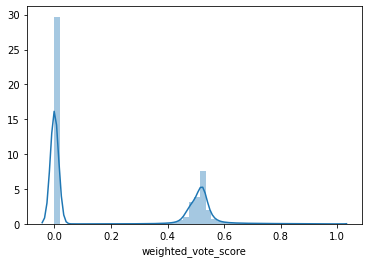

In [45]:
sns.distplot(Russian['weighted_vote_score'])
print("Mean: ", Russian['weighted_vote_score'].mean())
print("Variance: ", Russian['weighted_vote_score'].var())
print("STD: ", Russian['weighted_vote_score'].std())

### Something's off, let't not consider weighted scored that are equal to 0

Mean:  0.517954312916089
Variance:  0.0034734398821481497
STD:  0.05893589638028889


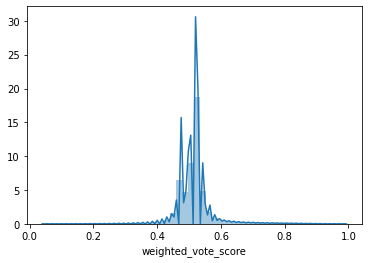

In [46]:
sns.distplot(Russian[Russian['weighted_vote_score'] > 0]['weighted_vote_score'])
print("Mean: ", Russian[Russian['weighted_vote_score'] > 0]['weighted_vote_score'].mean())
print("Variance: ", Russian[Russian['weighted_vote_score'] > 0]['weighted_vote_score'].var())
print("STD: ", Russian[Russian['weighted_vote_score'] > 0]['weighted_vote_score'].std())

### The line looks messy, but the mean and the distribution seems correct

### Same things for the Chinese reviews

Mean:  0.528143651058201
Variance:  0.006056499794707876
Standard Deviation:  0.07782351697724715


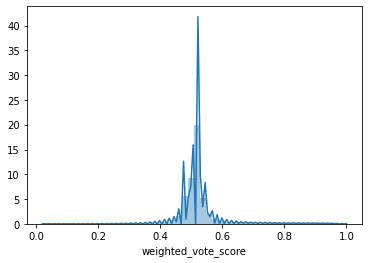

In [42]:
sns.distplot(Chinese[Chinese['weighted_vote_score'] > 0]['weighted_vote_score'])
print("Mean: ", Chinese[Chinese['weighted_vote_score'] > 0]['weighted_vote_score'].mean())
print("Variance: ", Chinese[Chinese['weighted_vote_score'] > 0]['weighted_vote_score'].var())
print("Standard Deviation: ", Chinese[Chinese['weighted_vote_score'] > 0]['weighted_vote_score'].std())

### Now for hypothesis testing. We are going to use the T-Test to compare if there is a significant difference between the means of Russian and Chinese weighted vote scores

In [48]:
from scipy.stats import ttest_ind

Hypothesis: Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian?

In [145]:
ttest, pval = ttest_ind(Russian['weighted_vote_score'], Chinese['weighted_vote_score'])
print("p-value: ", pval)
if pval < 0.005:
    print("Rejecting null hypothesis: the difference is insignificant")
else:
    print("Accepting null hypothesis: the difference is significant")

p-value:  0.0
Rejecting null hypothesis: the difference is insignificant


### [8.2] Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

### First let's consider only those reviews which were updated at any time and have the weighted vote score of bigger than 0

In [67]:
df_upd = df[(abs(df['timestamp_created']-df['timestamp_updated']) > 0) & df['weighted_vote_score'] > 0]
df_upd

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
27,292030,The Witcher 3: Wild Hunt,85177648,schinese,🎁\n🎁’[h1] [b]‘官方奖励免费活动链接:→ https://usnhskhf.w...,1611368730,1611379495,True,39,0,...,True,False,False,76561198326913512,69,28,1734.0,0.0,1734.0,1.608667e+09
721,292030,The Witcher 3: Wild Hunt,85039997,english,"The Witcher 3 is the greatest game ever made, ...",1611158900,1611243355,True,1,0,...,True,False,False,76561198966856935,16,1,6116.0,2776.0,5124.0,1.611368e+09
792,292030,The Witcher 3: Wild Hunt,85030619,turkish,Oyun bug lı. Çok hata var ve acayip sinirlendi...,1611146661,1611147086,False,0,0,...,True,False,False,76561198335936848,59,6,303.0,28.0,303.0,1.610741e+09
900,292030,The Witcher 3: Wild Hunt,85011047,schinese,“我是利维亚的杰洛特。“\n”我是杰洛特的叶奈法。“,1611112971,1611187571,True,0,0,...,True,False,False,76561198142358615,43,17,2314.0,1215.0,2295.0,1.611327e+09
962,292030,The Witcher 3: Wild Hunt,84996010,russian,"Мне понравилось , мир с кучей дополнительного ...",1611088439,1611088511,True,1,0,...,True,False,False,76561198181264826,94,13,7250.0,2227.0,7098.0,1.611351e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747361,546560,Half-Life: Alyx,65645333,english,"""""""""Not all lefties want to walk with their Ri...",1584986911,1585589559,True,0,0,...,True,False,False,76561198055305524,106,12,1876.0,0.0,44.0,1.586608e+09
21747362,546560,Half-Life: Alyx,65645312,english,"Ouch.\n\nI've played a LOT of other VR titles,...",1584986884,1584989792,True,14,0,...,False,False,False,76561197997569585,383,32,1329.0,0.0,25.0,1.604158e+09
21747367,546560,Half-Life: Alyx,65645193,spanish,"Juegazo, y ademas con el ADN de Half Life al 1...",1584986790,1585125462,True,1,0,...,True,False,False,76561198041215776,958,120,1543.0,0.0,52.0,1.605652e+09


### What is the mean value of the time in which people update their reviews?

In [113]:
time_mean = pd.to_datetime((df_upd['timestamp_updated'] - df_upd['timestamp_created']), unit='s').mean()
time_mean

Timestamp('1970-11-04 03:26:16.335764896')

In [120]:
print("Mean: " + str(time_mean)[5:7] + ' months ' + str(time_mean)[8:10] + ' days ' + str(time_mean)[11:19])

Mean: 11 months 04 days 03:26:16


This means that the mean value of the time that passes between initial and updated reviews is 11 months apart.

That's almost an year! Let's see if people who waited more than 11 months before changing their reviews differ from those who just casually update their reviews.

### Now let's take a look at the distribution of the time that passed after people updated their reviews

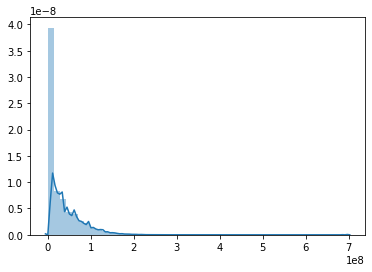

In [72]:
sns.distplot((df_upd['timestamp_updated'] - df_upd['timestamp_created']))

### Most of it is in the first half. Let's divide the distribution to the left and right sides of the mean and compare them

In [122]:
right_mean = df_upd[(df_upd['timestamp_updated'] - df_upd['timestamp_created']) > upd_mean]

In [225]:
left_mean = df_upd[(df_upd['timestamp_updated'] - df_upd['timestamp_created']) < upd_mean]

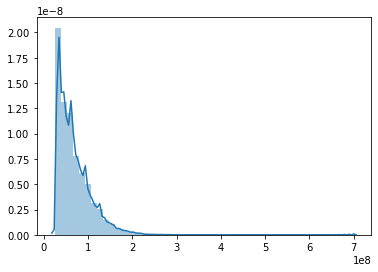

In [123]:
sns.distplot((right_mean['timestamp_updated'] - right_mean['timestamp_created']))

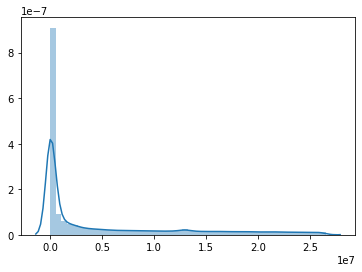

In [226]:
sns.distplot((left_mean['timestamp_updated'] - left_mean['timestamp_created']))

### Comparing means and stds of the main set and two subsets

In [130]:
print("mean:", df_upd['weighted_vote_score'].mean())
print("std:", df_upd['weighted_vote_score'].std())

mean: 0.5245182329554224
std: 0.07687891770206907


In [227]:
print("mean:", left_mean['weighted_vote_score'].mean())
print("std:", left_mean['weighted_vote_score'].std())

mean: 0.52674563159992
std: 0.08316800088135237


In [131]:
print("mean:", right_mean['weighted_vote_score'].mean())
print("std:", right_mean['weighted_vote_score'].std())

mean: 0.5203006518342266
std: 0.06306581656220943


### We are going to use Z-Test for this hypothesis

In [132]:
from scipy import stats
from statsmodels.stats import weightstats as stests

Hypothesis: Is there any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score?

In [230]:
ztest, pval1 = stests.ztest(left_mean['weighted_vote_score'], right_mean['weighted_vote_score'])
print("p-value:", float(pval1))
if pval1<0.005:
    print("Rejecting null hypothesis: The time passed between reviews doesn't affect the Weighted Vote Score")
else:
    print("Accepting null hypothesis: The time passed between reviews affects the Weighted Vote Score")

p-value: 0.0
Rejecting null hypothesis: The time passed between reviews doesn't affect the Weighted Vote Score


### [8.3] Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

### Let's divide the dataset that we used above into two groups: recommended and not

In [231]:
rec_t = left_mean[left_mean['recommended'] == True]
rec_f = left_mean[left_mean['recommended'] == False]

In [232]:
rec_t1 = right_mean[right_mean['recommended'] == True]
rec_f1 = right_mean[right_mean['recommended'] == False]

### Checking the important information about the subsets

In [235]:
print("Mean: ", rec_t['weighted_vote_score'].mean())
print("Var: ", rec_t['weighted_vote_score'].var())
print("Std: ", rec_t['weighted_vote_score'].std())

Mean:  0.5374925069233814
Var:  0.006603814741203537
Std:  0.08126385876392739


In [236]:
print("Mean: ", rec_t1['weighted_vote_score'].mean())
print("Var: ", rec_t1['weighted_vote_score'].var())
print("Std: ", rec_t1['weighted_vote_score'].std())

Mean:  0.5243426513380075
Var:  0.003960045082568388
Std:  0.06292888909370947


In [237]:
print("Mean: ", rec_f['weighted_vote_score'].mean())
print("Var: ", rec_f['weighted_vote_score'].var())
print("Std: ", rec_f['weighted_vote_score'].std())

Mean:  0.4993789332266196
Var:  0.006671208382001901
Std:  0.08167746557038791


In [238]:
print("Mean: ", rec_f1['weighted_vote_score'].mean())
print("Var: ", rec_f1['weighted_vote_score'].var())
print("Std: ", rec_f1['weighted_vote_score'].std())

Mean:  0.504458765944906
Var:  0.0037299582174249797
Std:  0.061073383870758134


### And of course plot the distribution

#### Between recommended dataframes with different passed time on updating their reviews

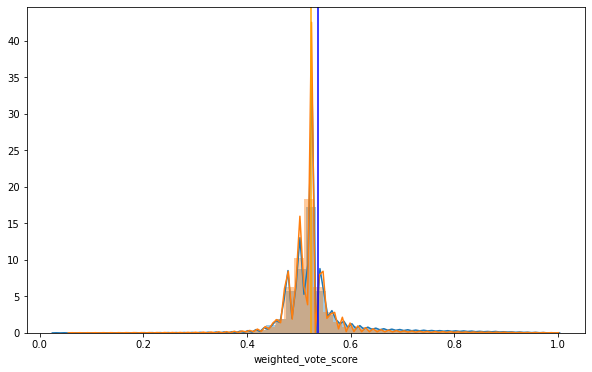

In [239]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(rec_t['weighted_vote_score'])
ax2 = sns.distplot(rec_t1['weighted_vote_score'])
plt.axvline(rec_t['weighted_vote_score'].mean(), color='b')
plt.axvline(rec_t1['weighted_vote_score'].mean(), color='orange')

#### Between not recommended dataframes with different passed time on updating their reviews

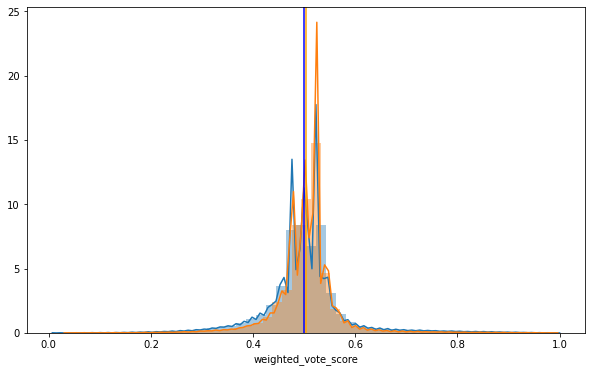

In [240]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(rec_f['weighted_vote_score'])
ax2 = sns.distplot(rec_f1['weighted_vote_score'])
plt.axvline(rec_f['weighted_vote_score'].mean(), color='b')
plt.axvline(rec_f1['weighted_vote_score'].mean(), color='orange')

#### Between recommended and not recommended dataframes

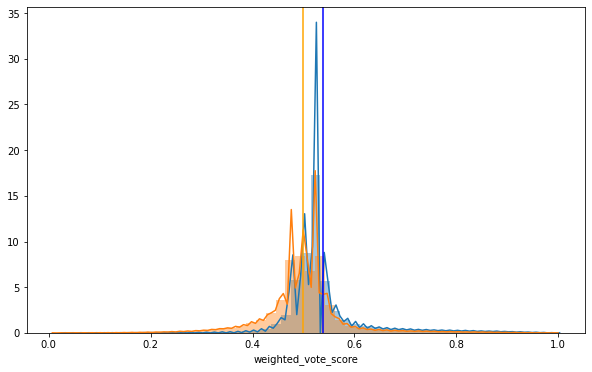

In [241]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(rec_t['weighted_vote_score'])
ax2 = sns.distplot(rec_f['weighted_vote_score'])
plt.axvline(rec_t['weighted_vote_score'].mean(), color='b')
plt.axvline(rec_f['weighted_vote_score'].mean(), color='orange')

#### Between recommended and not recommended dataframes with updated reviews after a long time

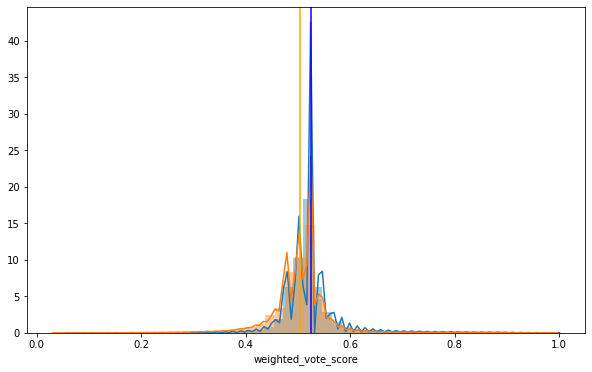

In [242]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(rec_t1['weighted_vote_score'])
ax2 = sns.distplot(rec_f1['weighted_vote_score'])
plt.axvline(rec_t1['weighted_vote_score'].mean(), color='b')
plt.axvline(rec_f1['weighted_vote_score'].mean(), color='orange')

### Distributions are mostly similar, only the recommended and not recommended are a little different. Anyway, the hypothesis testing will tell us the truth

In [245]:
ztest1, pval2 = stests.ztest(rec_t1['weighted_vote_score'], rec_f['weighted_vote_score'])
print("p-value:", float(pval2))
if pval2 < 0.005:
    print("Rejecting null hypothesis: The time passed between reviews and recommendation doesn't affect the Weighted Vote Score")
else:
    print("Accepting null hypothesis: The time passed between reviews and recommendation affects the Weighted Vote Score")

p-value: 0.0
Rejecting null hypothesis: The time passed between reviews and recommendation doesn't affect the Weighted Vote Score


I saw that coming from miles away. Even the true/false values on recommendations are not enough to make the difference.

###  [8.4] What are histograms, bar plots, scatterplots and pie charts used for?

Different types of plotting data can give us different visual information about that data. They mostly used to visualize and present the main information in the data to people.

In our homework we used bar plots, pie charts and distribution plots.

Histograms and bar plots are convinient to use when we want to show the general numbers of some data. Here is one of the bar plots we used to visualize which languages were more popular in reviews (from [RQ1]):

<BarContainer object of 28 artists>

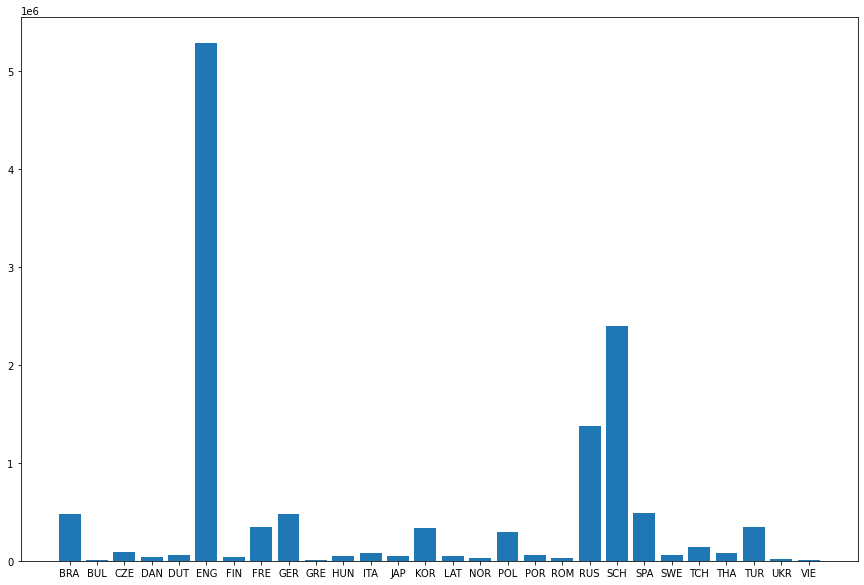

In [12]:
plt.figure(figsize = (15, 10))
plt.bar([''.join(str(x)[:3].upper()) for x in lang_count.index], lang_count['author.steamid'])

Pie charts mostly used to show the percentage difference between different information. Here we used pie chart to show what percentage of reviews were positive and what percentage were negative:

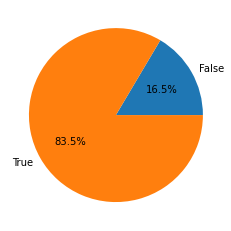

In [52]:
plt.pie(recommended['author.steamid'], labels = recommended.index, autopct='%1.1f%%')
plt.show() 

Scatterplots are mainly used to show the correlation between two different arrays. I don't think we really needed scatter plots in our code because we didn't do any kind of linear or logistic regression, but here is some random scatter plot to show how it works: 

The scatterplot below shows the correlation between the reviewer's playtime and the weighted vote score. 

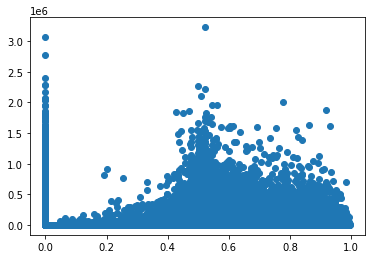

In [252]:
plt.scatter(df['weighted_vote_score'], df['author.playtime_at_review'])

### [8.5] What insights can you extract from a Box Plot?

Box plots can beatifully show us the quatiles of any numeric data. It's mainly used to filter out the outliers (exceptional values or errors). For example, in the scatterplot above we can see one little dot at the very top by y-axis and in the middle by x-axis. It's all alone over there, which is considered as an outlier.

Let's use box plot to show what amount of apps most of the people own:

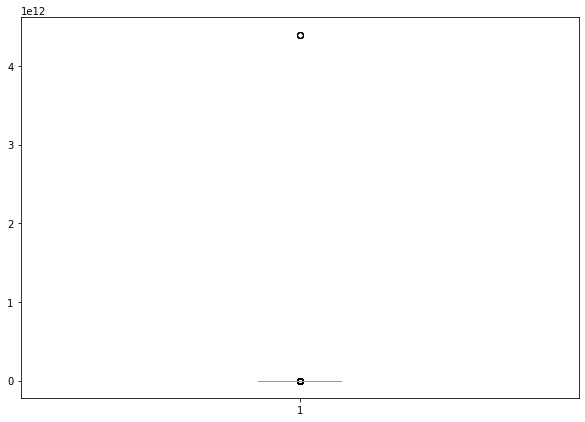

In [256]:
plt.figure(figsize =(10, 7))
plt.boxplot(df['author.num_games_owned'])
plt.show()

Wow, that one dot is absolutely an outlier. There's no way somebody own that many apps, there aren't even that many out there. Let's take a smaller number:

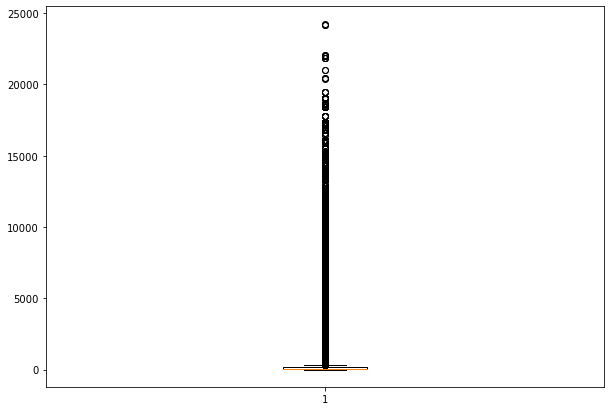

In [260]:
plt.figure(figsize =(10, 7))
plt.boxplot(df[df['author.num_games_owned'] < 100000]['author.num_games_owned'])
plt.show()

Maybe using _author.num_games_owned_ is not the best idea, but but we can see that the biggest margin of people own less than a thousand, no, **hundred** applications:

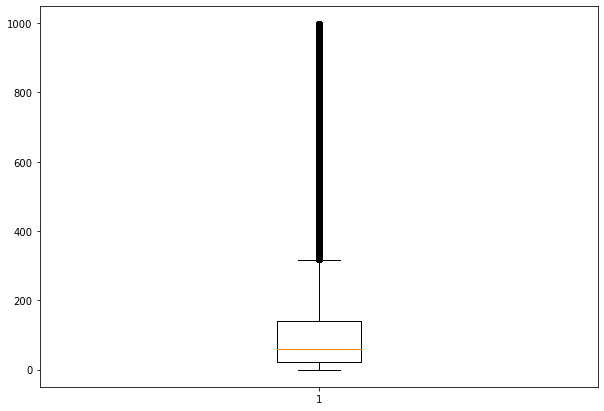

In [261]:
plt.figure(figsize =(10, 7))
plt.boxplot(df[df['author.num_games_owned'] < 1000]['author.num_games_owned'])
plt.show()

I myself own only 20 apps lol.

Some madlads own more than 20000 apps, they are most likely the steam developers or some different exceptions.

That's basically how we use box plots, not the best example though, but I guess we could explain its main purpose.

# Theoretical Questions

## TQ1

We are given the following algorithm.

```
Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
```

1.What does the algorithm compute?

This algorithm is similar to the binary search algorithm, but the difference is that in the binary search algorithm, the interval is equally divided from the middle each time, and in this algorithm, the interval (array) is randomly divided each time according to s.

The rest of the algorithm is the same as the binary search algorithm, its purpose is to find the kth target element in the 1-n length array.



2.What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

The worst case is that we cut all of other elements by steps, and the last array A only has the element we want.

Because s is a random element, so the running time of this algorithm can be describe as follow:

$$T(n) = \frac{1}{p}T(1)+\frac{1}{p}T(2)+...+\frac{1}{p}T(n) + 1 $$

For T(n), n = p. We can get the equation below:

$T(n)=(T(1)+T(2)+\ldots \ldots+T(n)) / n+1$

$n^{*} T(n)=T(1)+T(2)+\ldots+T(n)+n$

For T(n-1), we can get equation by same way:

$(n-1) * T(n-1)=T(1)+T(2)+\cdots \cdot+T(n-1)+n-1$

Calculate nT(n) - (n-1)T(n-1):

$n^{*} T(n)-(n-1) * T(n-1)=T(n)+1$

By simplifying the above formula, we can get:

$T(n)=1 /(n-1)+T(n-1)$

By recursing the above formula, we can get:

$T(n)=1 /(n-1)+1 /(n-2)+T(n-2)$

$T(n)=1 /(n-1)+1 /(n-2)+1 /(n-3)+T(n-3)$

······

$T(n)=1+1 / 2+1 / 3+\ldots+1 /(n-1)$

We can get that T(n) is equal to (n-1)th Harmonic number, and $\sum_{n=1}^{k} \frac{1}{n}=\ln k+\gamma+\varepsilon_{k}$

Hence T(n) is O($\log n$)

3.What is asymptotically the running time of the algorithm in the best case?
In best case, it means we can get the target value in first random selection of s. Hence the running time in this situation is O(1).

## [TQ2]
### Question 1
There are no constraints to values in the code, but we need to specificy only that the parameter $n$ must be $n < len(a)$ to not encounter in a “list index out of range exception” and $n > 0$ becouse we cannot compute the algorithm on a 0 lenght sub-list.

The computation analysis starts from the smaller function $swapList()$ that has a time complexity of $O(n)$ as shown:
$$
\sum_{i=0}^{n/2}[\Theta(1)+\Theta(1)+\Theta(1)] \approx \frac{n}{2}(3*\Theta(1)) =\Theta(\frac{3}{2}n)\approx O(n)
$$
After that we can compute the complexity of the $splitSwap()$ function, that is a recursive function, so we have:

Basic case:

$$
T(n=1) = \Theta(1)
$$

General recursive case:

$$
T(n)=T(\frac{n}{2})+T(\frac{n}{2})+\Theta(\frac{3}{2}n)=2T(\frac{n}{2})+\Theta(\frac{3}{2}n)
$$

We can expand it calculating for $T(\frac{n}{2})$.

So we obtain:

$$
T(n)=2*[2*T(\frac{\frac{n}{2}}{2})+\Theta(\frac{3}{2}*\frac{n}{2})]+\Theta(\frac{3}{2}n)\\
    =4*T(\frac{n}{4})+2*\frac{1}{2}*\Theta(\frac{3}{2}n)+\Theta(\frac{3}{2}n)\\
    =4*T(\frac{n}{4})+2*\Theta(\frac{3}{2}n)\\
    =2^{2}*T(\frac{n}{2^{2}})+2*\Theta(\frac{3}{2}n)
$$

We can expand more calculating for $T(\frac{n}{4})$

$$
T(n)=4*[2*T(\frac{\frac{n}{4}}{2})+\Theta(\frac{3}{2}*\frac{n}{4})]+2*\Theta(\frac{3}{2}n)\\=
8*T(\frac{n}{8})+4*\frac{1}{4}*\Theta(\frac{3}{2}n)+2*\Theta(\frac{3}{2}n)\\=
8*T(\frac{n}{8})+3*\Theta(\frac{3}{2}n)\\=
2^{3}*T(\frac{n}{2^{3}})+3*\Theta(\frac{3}{2}n)
$$

Expanding after that in the same way, it can be possible to recognize a path:

$$
T(n)=2^{i}*T(\frac{n}{2^{i}})+i*\Theta(\frac{3}{2}n)
$$

And it stops, according to the code, when $n <= 1$, so when $n = 1$ according to our constraints, that corresponds to a value of $i$:
$$
\frac{n}{2^{i}}=1\Rightarrow n=2^{i}\Rightarrow i=\log_2 n
$$

We can substitute the value of $i$ applying a property of logarithm that is $n = 2^{\log_2 n}$

So we obtain:
$$
n*T(1)+log_2 (n)*\Theta(\frac{3}{2}n)
$$

Applying Big O analysis we can simply writing:
$$
\approx O(n)+O(log(n)*n) = O(n*log(n))
$$

So the complexity (with O-notation) is $O(n*log(n))$ 

### Question 2

This algorithm, based on the function **“splitSwap()”** called recursively two times, is taking an array **“a”** as input and change its elements such that, starting from the index chosen **“l”** it swap element following instruction given by the internal method **“swapList()”** until the value of n is <= 1. The value **“n”**, which is also a parameter of the function, represent the final length of the swapped sub-list.

More precisely, the internal function **“swapList()”**, using a  temporary variable inside a for cicle that loops from 0 to n/2 the index i, reverses the values of the element at index **l+i** with the element at index  **l+i+n/2**.

To be clearer with an example, this is the output of the algorithm (printed array “a”) using as parameters:
- a is an array containing ordered integers from 0 to 20 (ordered only for a better vision reason, because values corresponds to indexes)
- n = 4
- l = 5

Output showing steps: 

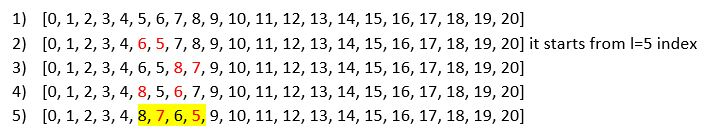

In [4]:
from IPython.display import Image
Image(filename='TQ2_screen_1.jpg')

In red there are the swapped elements on each iteration and highlighted there is the final string, that in fact has n=4 as a length.

Another example could be with:
- n = 10
- l = 5

Output showing steps: 

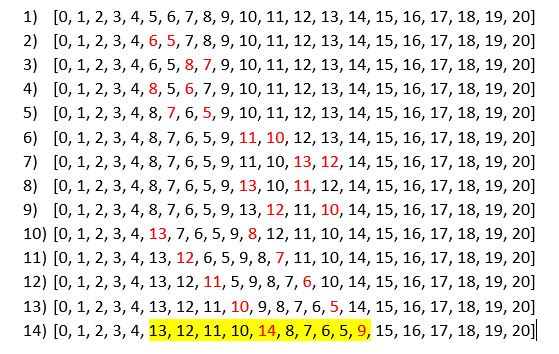

In [5]:
from IPython.display import Image
Image(filename='TQ2_screen_2.jpg')

As it could be expected the length of the string is n = 10 and the algorithm starts to compute from index l = 5.
There are two important observations:

- To be careful to maintain values of n and l such that **len(a) > l + n/2 + I** to not encounter in a “list index out of range exception”.
- To be careful giving **odd values to n**, since there is a division by 2. In most of the programming language it’s not possible to iterate over float numbers, so we have to use *to_int* functions like round() in Python.

Finally, the algorithm is not optimal because it could be possible to create a better one with complexity $O(n)$, using a direct for loop in which for every iteration, $n$ is divided by 2 and then the swaps are computed, both with $l$ index and with $l+\frac{n}{2}$ 

## TQ3

What is asymptotically the running time of the algorithm in the best case?

In best case, it means we can get the target value in first random selection of s. Hence the running time in this situation is O(1).

In the knapsack problem we are given n objects and each object *i* has a weight *w_i* and a value *v_i*. We are also given a weight budget *W*. The problem is to select a set of objects with total weight bounded by *W* that maximized the sum of their values. The following are three natural heuristics:

- Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded
- Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded
- Order them in decreasing relative value *(v_i / w_i)*, and then visit them sequentially, adding them to the solution if the budget is not exceeded

For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.



1) order by weight 

|   ID   |  1   |  2   |  3   |  4   |  5   |
| :----: | :--: | :--: | :--: | :--: | :--: |
| weight |  2   |  2   |  6   |  5   |  4   |
| value  |  2   |  3   |  7   |  5   |  4   |

We assume that weight bounded is C = 10.

In the case above, order by weight. We can get table below:

|   ID   |  1   |  2   |  5   |  4   |  3   |
| :----: | :--: | :--: | :--: | :--: | :--: |
| weight |  2   |  2   |  4   |  5   |  6   |
| value  |  2   |  3   |  4   |  5   |  7   |

By first heuristic, we will chose 1 2 5 as the solution. Total value is 2+3+4 = 9, and total weight is 8. But if we chose 1 2 3, total value is 12, and total weight is 10. this solution is better than what we get from first heuristics. It fails to provide the optimal solution.



2) order by value

We use the same case above. After sorting by value, we get table below:

|   ID   |  3   |  4   |  5   |  2   |  1   |
| :----: | :--: | :--: | :--: | :--: | :--: |
| weight |  6   |  5   |  4   |  2   |  2   |
| value  |  7   |  5   |  4   |  3   |  2   |

By second heuristic, we will chose 3 5 as the solution.  Total value is 4+7 = 11, and total weight is 10.  But if we chose 1 2 3, total value is 12, and total weight is 10. this solution is better than what we get from second heuristics. It fails to provide the optimal solution.



3) order by ($v_i / w_i$)

In this part we consider a new example:

|      ID      |  1   |  2   |  3   |  4   |  5   |
| :----------: | :--: | :--: | :--: | :--: | :--: |
|    weight    |  20  |  30  |  40  |  50  |  90  |
|    value     |  38  |  57  |  50  |  98  | 180  |
| value/weight | 1.9  | 1.9  | 1.25 | 1.96 |  2   |

We assume that weight bounded is C = 100.

In this example, if we chose the object by third heuristics, we will chose 5. Total value is 180, and total weight is 90. But if we chose 1 2 4, total value is 193, and total weight is 100. this solution is better than what we get from third heuristics. It fails to provide the optimal solution.